In [ ]:
#SmartKnower(Data Science with Python-MINOR-JULY)
#Project Name : Wine Quality Prediction
#Name: V V DHANVANTHAR M
#DS-MINOR-JULY

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()
import io



Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
row,col=df.shape#knowing number of features and data size
print(row,",",col)


1599 , 12


In [ ]:
#Data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 There is no null values, and no categorical data

In [ ]:
#knowing the number of red wine quality classes
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Making binary classificaion for the target by dividing wine as g for good and b for bad.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.5, 8)
groups = ['b', 'g']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = groups)

In [ ]:
L_quality = LabelEncoder()

In [ ]:
df['quality'] = L_quality.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [ ]:
df.shape

(1599, 12)

In [ ]:
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_test = df_test.drop('quality', axis=1)
y_train = df_train['quality']
y_test = df_test['quality']


(480,)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

#train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=250,
    epochs=100,
    verbose=0
)

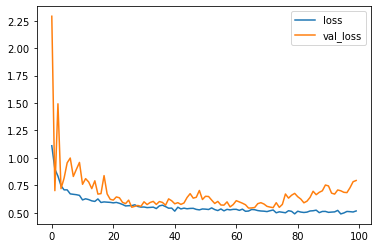

In [ ]:

#show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Best Validation Loss: 0.5418
Best Validation Accuracy: 0.7375


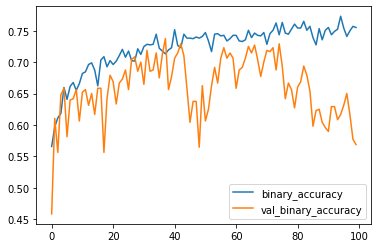

In [ ]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

So here we obtained the best validation accuracy as 0.7375 and validation loss: 0.5418 by the custom model defined above